# Figure 6

In [76]:
library(RColorBrewer)

In [69]:
dib_ncgr_kmers <- read.csv("../assembly_evaluation_data/unique_kmers.csv")
unique_dammit_names <- read.csv("../assembly_evaluation_data/normalized_unique_gene_names_ncgr_dib.csv")
unique_dammit_names <- unique_dammit_names[,2:4]
colnames(unique_dammit_names) <- c("SampleName","NCGR","DIB")
unique_dammit_names <- merge(dib_ncgr_kmers,unique_dammit_names,by="SampleName")
unique_dammit_names <- unique_dammit_names[,c(1,2,5,6)]
#head(dib_ncgr_kmers)
#dim(dib_ncgr_kmers)
head(unique_dammit_names)
#dim(unique_dammit_names)
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018",
                    "MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196",
                    "MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")
unique_dammit_names <- unique_dammit_names[!unique_dammit_names$SampleName %in% special_flowers,]

SampleName,Phylum,NCGR,DIB
MMETSP0007,Haptophyta,0.1553238,0.3038187
MMETSP0009,Bacillariophyta,0.1250278,0.2619097
MMETSP0011,Rhodophyta,0.1282602,0.3395015
MMETSP0018,Ciliophora,0.5238095,0.9876067
MMETSP0040,Cercozoa,0.1054775,0.3242380
MMETSP0041,Cercozoa,0.1685256,0.3280542


The following are MMETSP samples with multiple sequencing runs, each with separate re-assemblies (see [explanation](https://github.com/ljcohen/MMETSP/blob/master/notebooks/MMETSP_imicrobe_NCBI-SRA_sample_id_verification.ipynb)). These are excluded from all quality analyses: 

In [70]:
# Only use 7 most common phyla
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")

pdf 
  2

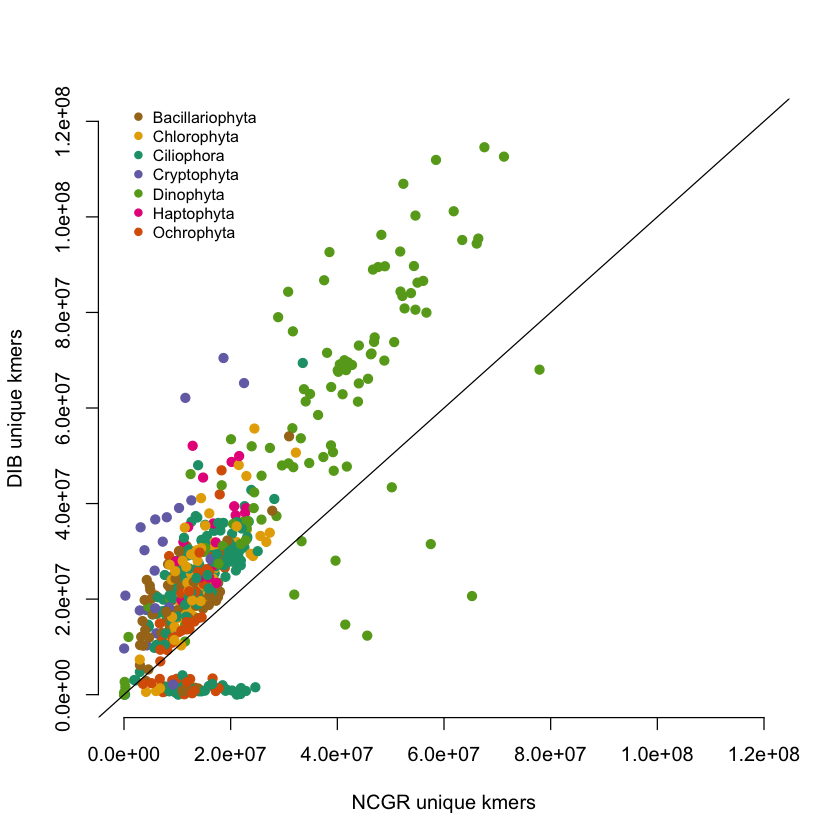

In [77]:
Cols = function(vec){
  cols=cols=palette(brewer.pal(n=7,name="Dark2"))
  return(cols[as.numeric(as.factor(vec))])}

dib_ncgr_kmers <- dib_ncgr_kmers[!dib_ncgr_kmers$SampleName %in% special_flowers,]
#dim(dib_ncgr_kmers)
#head(dib_ncgr_kmers)
dib_greater<-dib_ncgr_kmers[which(dib_ncgr_kmers$DIB>dib_ncgr_kmers$NCGR),]
ncgr_greater<-dib_ncgr_kmers[which(dib_ncgr_kmers$NCGR>dib_ncgr_kmers$DIB),]
#dim(dib_greater)
#dim(ncgr_greater)
dib_ncgr_kmers<-dib_ncgr_kmers[dib_ncgr_kmers$Phylum %in% sub_phy,]
pdf("../paper/Figure6_unique_kmers.pdf")
png("../paper/Figure6_unique_kmers.png")
plot(dib_ncgr_kmers$Unique_kmers,dib_ncgr_kmers$Unique_kmers_assembly, ylim=c(-1,120000000),xlim=c(-1,120000000),ylab = "DIB unique kmers",xlab="NCGR unique kmers",col=Cols(as.character(dib_ncgr_kmers$Phylum)),pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=unique(as.character(dib_ncgr_kmers$Phylum)),col=Cols(unique(as.character(dib_ncgr_kmers$Phylum))),cex=0.8, pch=19,bty="n")
dev.off()
plot(dib_ncgr_kmers$Unique_kmers,dib_ncgr_kmers$Unique_kmers_assembly, ylim=c(-1,120000000),xlim=c(-1,120000000),ylab = "DIB unique kmers",xlab="NCGR unique kmers",col=Cols(as.character(dib_ncgr_kmers$Phylum)),pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=sort(unique(as.character(dib_ncgr_kmers$Phylum))),col=Cols(unique(as.character(dib_ncgr_kmers$Phylum))),cex=0.8, pch=19,bty="n")

In [72]:
dib_ncgr_kmers <- dib_ncgr_kmers[!dib_ncgr_kmers$SampleName %in% special_flowers,]
dib_ncgr_kmers<-dib_ncgr_kmers[dib_ncgr_kmers$Phylum %in% sub_phy,]
unique(as.character(dib_ncgr_kmers$Phylum))

[1] "Ochrophyta"      "Haptophyta"      "Bacillariophyta" "Ciliophora"     
[5] "Dinophyta"       "Cryptophyta"     "Chlorophyta"

# Figure 7

In [73]:
head(unique_dammit_names)

SampleName,Phylum,NCGR,DIB
MMETSP0007,Haptophyta,0.1553238,0.3038187
MMETSP0009,Bacillariophyta,0.1250278,0.2619097
MMETSP0011,Rhodophyta,0.1282602,0.3395015
MMETSP0018,Ciliophora,0.5238095,0.9876067
MMETSP0040,Cercozoa,0.1054775,0.3242380
MMETSP0041,Cercozoa,0.1685256,0.3280542


pdf 
  2

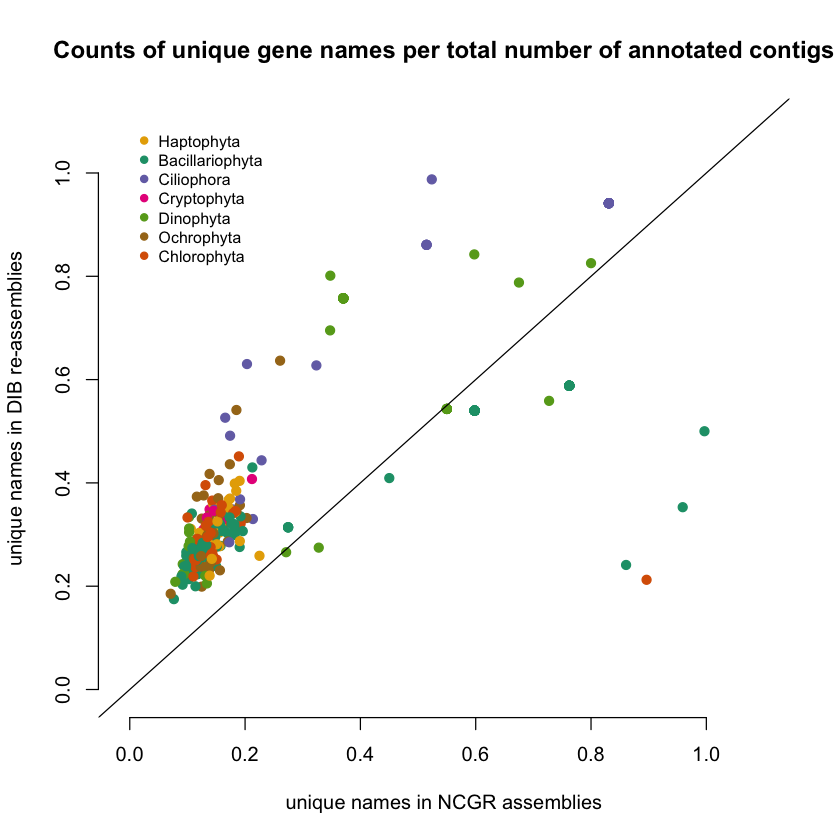

In [39]:
library(RColorBrewer)
Cols = function(vec){
  cols=palette(brewer.pal(n=7,name="Dark2"))
  return(cols[as.numeric(as.factor(vec))])}

sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
unique_dammit_names <- unique_dammit_names[unique_dammit_names$Phylum %in% sub_phy,]
pdf("../paper/Figure7_unique_gene_names.pdf")
png("../paper/Figure7_unique_gene_names.png")
plot(unique_dammit_names$NCGR,unique_dammit_names$DIB,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,ylab = "unique names in DIB re-assemblies",xlab="unique names in NCGR assemblies",main="Counts of unique gene names per total number of annotated contigs",frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=unique(as.character(unique_dammit_names$Phylum)),col=Cols(unique(as.character(unique_dammit_names$Phylum))),cex=0.8, pch=19,bty="n")
dev.off()
plot(unique_dammit_names$NCGR,unique_dammit_names$DIB,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,ylab = "unique names in DIB re-assemblies",xlab="unique names in NCGR assemblies",main="Counts of unique gene names per total number of annotated contigs",frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=unique(as.character(unique_dammit_names$Phylum)),col=Cols(unique(as.character(unique_dammit_names$Phylum))),cex=0.8, pch=19,bty="n")

In [74]:
class(as.character(unique_dammit_names$Phylum))

[1] "character"

In [75]:
head(unique_dammit_names)

SampleName,Phylum,NCGR,DIB
MMETSP0007,Haptophyta,0.1553238,0.3038187
MMETSP0009,Bacillariophyta,0.1250278,0.2619097
MMETSP0011,Rhodophyta,0.1282602,0.3395015
MMETSP0018,Ciliophora,0.5238095,0.9876067
MMETSP0040,Cercozoa,0.1054775,0.3242380
MMETSP0041,Cercozoa,0.1685256,0.3280542


### What is the average percentage (± stdev) of newly-assembled contigs that annotated to a database (Pfam, Rfam, and OrthoDB)

In [45]:
num_contigs = read.csv("../assembly_evaluation_data/annotation_stats.csv")
dib_contig_nums = read.csv("../assembly_evaluation_data/transrate_reference_scores_cds.csv")
ncgr_contig_nums = read.csv("../assembly_evaluation_data/transrate_imicrobe_scores.csv")

In [40]:
num_contigs_sub = num_contigs[,c(1,2,3)]
contigs = dib_contig_nums[,c(2,44)]
colnames(num_contigs_sub) <- c("MMETSP","total_annotated_contigs","unique_anotations")
colnames(contigs)<-c("n_contigs","MMETSP")

In [85]:
num_contigs_new <- merge(num_contigs_sub,contigs,by="MMETSP")
num_contigs_new <- num_contigs_new[!num_contigs_new$MMETSP %in% special_flowers,]

In [87]:
head(num_contigs_new)

,MMETSP,total_annotated_contigs,unique_anotations,n_contigs
1,MMETSP0004,26851,12707,31798
2,MMETSP0005,26252,12246,30447
3,MMETSP0006,36795,17810,42819
4,MMETSP0007,17308,7773,26600
7,MMETSP0009,36990,12576,47658
8,MMETSP0010,35765,14801,35648


In [88]:
average_perc_annotated = mean(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)
average_perc_unique_annotated = mean(num_contigs_new$unique_anotations/num_contigs_new$n_contigs)

In [89]:
mean(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)

[1] 0.9106026

In [90]:
sd(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)

[1] 1.581437

In [91]:
mean(num_contigs_new$unique_anotations/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.4526137

In [92]:
sd(num_contigs_new$unique_anotations/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.8732772

In [47]:
head(ncgr_contig_nums)

assembly,SampleName,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,⋯,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0909.cds.fa.fixed.fa,MMETSP0909,17793,150,5295,13335459,726.3241,2371,4918,0,⋯,0.62997,73,0.00410,2864,0.16096,5822,0.32721,0.08002,0.08486,0.02586
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP1138.cds.fa.fixed.fa,MMETSP1138,21907,150,13716,22494042,1016.9273,1248,8959,4,⋯,0.75834,3558,0.16241,11314,0.51646,621,0.02835,0.15532,0.29205,0.46644
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0317.cds.fa.fixed.fa,MMETSP0317,10424,150,14124,12824577,1225.5069,287,5182,5,⋯,0.68314,1624,0.15579,4927,0.47266,142,0.01362,0.29773,0.48681,0.45753
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0370.cds.fa.fixed.fa,MMETSP0370,54971,150,7545,41366781,725.2256,8621,15861,0,⋯,0.67985,291,0.00529,21782,0.39625,2127,0.03869,0.17398,0.24414,0.41163
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP1412.cds.fa.fixed.fa,MMETSP1412,14977,150,11460,19276146,1275.2630,1015,7611,2,⋯,0.66075,43,0.00287,3505,0.23403,1752,0.11698,0.22650,0.25427,0.32807
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0527.cds.fa.fixed.fa,MMETSP0527,69295,150,14601,78969480,1126.2404,5335,30963,43,⋯,0.76190,8868,0.12797,40461,0.58389,1478,0.02133,0.22165,0.39974,0.52570


In [106]:
false_crbb <- num_contigs[,c(1,4)]
colnames(false_crbb)<-c("MMETSP","annotations_w_false_crbb")
false_crbb <- false_crbb[!false_crbb$MMETSP %in% special_flowers,]
num_contigs_new <- merge(num_contigs_new,false_crbb,by="MMETSP")

In [107]:
head(num_contigs_new)

MMETSP,total_annotated_contigs,unique_anotations,n_contigs,annotations_w_false_crbb
MMETSP0004,26851,12707,31798,2246
MMETSP0005,26252,12246,30447,1748
MMETSP0006,36795,17810,42819,4691
MMETSP0007,17308,7773,26600,1368
MMETSP0009,36990,12576,47658,NA
MMETSP0010,35765,14801,35648,3675


In [108]:
mean(num_contigs_new$annotations_w_false_crbb/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.07884789

In [109]:
sd(num_contigs_new$annotations_w_false_crbb/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.1942385